In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as stats
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import display, HTML
from IPython.display import Image, display
from collections import Counter

In [2]:
# uncomment to increase display size
# display(HTML("<style>.container { width:100% !important; }</style>"))

## Data Import

In [3]:
# import csv's into dataframes
red_wine = pd.read_csv('winequality-red.csv', ';')
dfr = red_wine
red_wine.shape

white_wine = pd.read_csv('winequality-white.csv', ';')
dfw = white_wine
white_wine.shape

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3131501647.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  red_wine = pd.read_csv('winequality-red.csv', ';')


(1599, 12)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3131501647.py:6: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  white_wine = pd.read_csv('winequality-white.csv', ';')


(4898, 12)

### Data Description

In [4]:
# red wine
dfr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<BarContainer object of 6 artists>

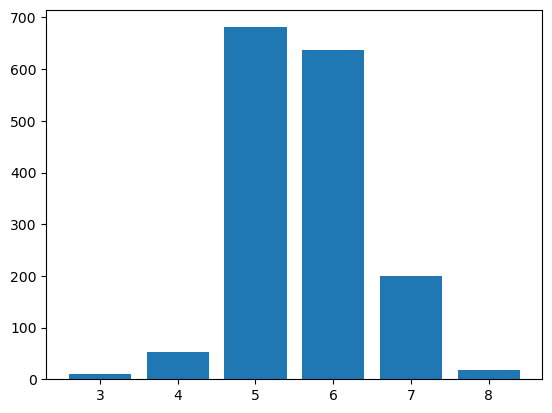

In [5]:
# distribution of quality for red wine
value_counts = Counter(dfr['quality'])
redx = list(value_counts.keys())
redy = list(value_counts.values())
plt.bar(redx, redy)

In [6]:
# white wine
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<BarContainer object of 7 artists>

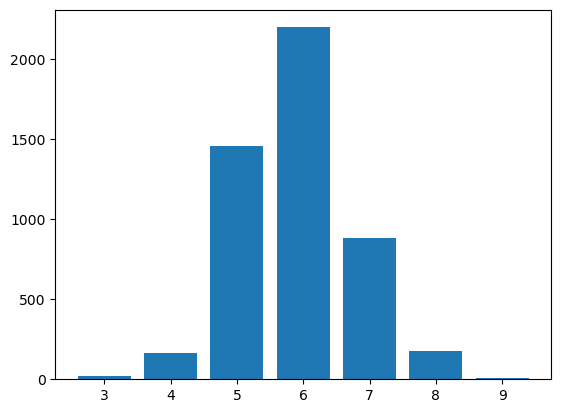

In [7]:
# distribution of quality for white wine
value_counts = Counter(dfw['quality'])
whitex = list(value_counts.keys())
whitey = list(value_counts.values())
plt.bar(whitex, whitey)

### Feature Importance Function

In [8]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## Red Wine Decision Tree

In [9]:
# convert the data into a 2D array with np.newaxis
X = dfr.drop('quality', axis=1)
y = dfr['quality'][:,np.newaxis]

# split the red wine data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\1341055060.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dfr['quality'][:,np.newaxis]


Text(0.5, 0, 'Depth')

Text(0, 0.5, 'R^2')

Text(0.5, 1.0, 'Red Wine Accuracy Chart')

6


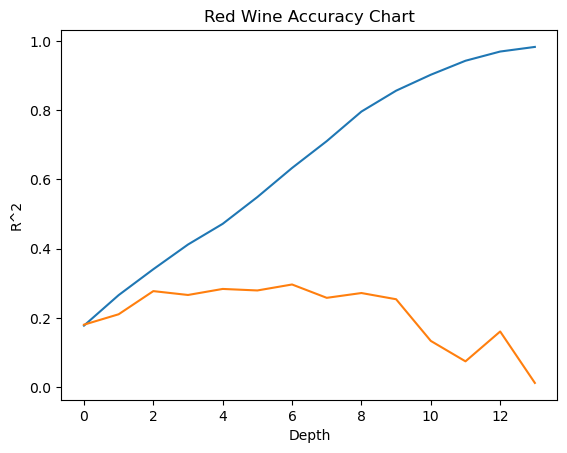

In [10]:
# create a list for train and test scores to find the best depth
# z.score is not zscore
rtrain = []
rtest = []
for i in range(1,15):
    z = DecisionTreeRegressor(max_depth=i, random_state=42).fit(X_train, y_train)
    rtrain.append(z.score(X_train, y_train))
    rtest.append(z.score(X_test, y_test))

# plot the graph to see best max depth
plt.plot(rtrain)
plt.plot(rtest)
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.title('Red Wine Accuracy Chart')

# find the best depth based on highest test accuracy
rmaxd = rtest.index(max(rtest))
print(rmaxd)

In [11]:
# fit tree
rtree = DecisionTreeRegressor(max_depth=rmaxd, random_state=42).fit(X_train, y_train)

# predict on all data
X_all = X
pred_tree = rtree.predict(X_all)

In [1]:
# create a decision tree and output it into a png by navigating to the file in cmd prompt then using:
# dot -Tpng redtree.dot > redtree.png
r_feature_names = dfr.columns.values.tolist()
r_feature_names.remove('quality')
export_graphviz(rtree, out_file="redtree.dot",feature_names = r_feature_names, filled = True, rounded=True)
display(Image(filename='redtree.png'))

NameError: name 'dfr' is not defined

In [13]:
# print accuracy of tree
# MSE
print("Mean squared error for train set: %.2f" % mean_squared_error(y_train, rtree.predict(X_train)))
print("Mean squared error for test set: %.2f" % mean_squared_error(y_test, rtree.predict(X_test)))

# RMSE
print("Root Mean squared error for train set: %.2f" % math.sqrt(mean_squared_error(y_train, rtree.predict(X_train))))
print("Root Mean squared error for test set: %.2f" % math.sqrt(mean_squared_error(y_test, rtree.predict(X_test))))

# Coefficient of determination
print('Train set R^2: {:.3f}'.format(rtree.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(rtree.score(X_test, y_test)))

Mean squared error for train set: 0.29
Mean squared error for test set: 0.47
Root Mean squared error for train set: 0.54
Root Mean squared error for test set: 0.68
Train set R^2: 0.549
Test set R^2: 0.279


In [14]:
# print feature importanct of red wine
r=0
for i in X:
    print('{f}: {g:.3f}'.format(f=i, g=rtree.feature_importances_[r]))
    r+=1

fixed acidity: 0.023
volatile acidity: 0.178
citric acid: 0.005
residual sugar: 0.022
chlorides: 0.038
free sulfur dioxide: 0.031
total sulfur dioxide: 0.040
density: 0.030
pH: 0.022
sulphates: 0.177
alcohol: 0.434


array([0.02259522, 0.17807193, 0.0045791 , 0.02240624, 0.03785644,
       0.03069933, 0.03994394, 0.03029159, 0.02240568, 0.17681453,
       0.43433599])

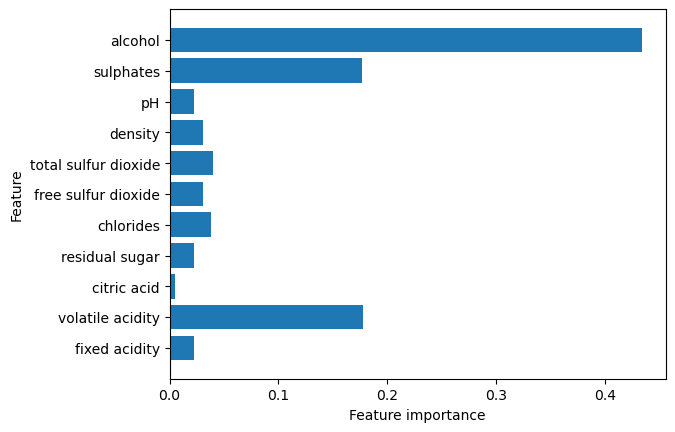

In [15]:
# plot the features
plot_feature_importances(rtree)
rtree.feature_importances_

### Red Wine Forest

In [16]:
rforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None)

rforest.fit(X_train, y_train)

rforest.predict(X_train)
rforest.predict(X_test)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\2843042639.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

array([5.05, 5.16, 5.09, ..., 5.2 , 5.25, 5.97])

array([5.84, 5.07, 5.12, 6.3 , 4.98, 5.99, 5.01, 5.06, 5.71, 5.74, 5.34,
       5.47, 5.66, 5.42, 5.28, 6.54, 5.15, 5.04, 5.56, 5.63, 6.27, 6.41,
       6.34, 7.28, 5.5 , 5.96, 6.48, 5.06, 6.72, 5.71, 5.8 , 5.57, 5.43,
       4.99, 6.1 , 5.53, 4.74, 5.85, 5.28, 5.21, 6.16, 4.89, 5.97, 5.65,
       6.01, 6.72, 5.02, 5.36, 6.13, 5.55, 5.4 , 5.05, 5.42, 6.69, 5.45,
       5.1 , 5.92, 6.4 , 6.14, 6.26, 5.29, 4.91, 5.12, 5.32, 5.72, 5.64,
       5.75, 5.11, 5.83, 5.58, 6.41, 6.31, 5.83, 5.84, 6.18, 5.15, 6.26,
       5.51, 5.75, 5.06, 5.9 , 4.44, 6.1 , 5.06, 6.02, 5.12, 5.79, 6.41,
       6.02, 6.26, 6.84, 5.79, 4.85, 5.21, 6.13, 5.35, 4.94, 5.5 , 5.  ,
       6.05, 5.56, 6.24, 4.93, 5.36, 5.14, 6.86, 5.93, 5.26, 6.97, 5.7 ,
       6.76, 5.52, 5.6 , 6.6 , 6.08, 6.  , 5.62, 6.56, 5.06, 5.42, 5.71,
       6.48, 4.89, 5.7 , 5.83, 6.07, 5.07, 6.37, 5.66, 6.23, 5.29, 5.6 ,
       5.74, 5.81, 6.49, 5.69, 4.93, 5.01, 5.03, 5.35, 5.81, 5.04, 5.02,
       5.17, 5.05, 5.09, 5.99, 5.61, 7.04, 5.5 , 5.

In [17]:
# MSE
print("Mean squared error for train set: %.2f" % mean_squared_error(y_train, rforest.predict(X_train)))
print("Mean squared error for test set: %.2f" % mean_squared_error(y_test, rforest.predict(X_test)))

# RMSE
print("Root Mean squared error for train set: %.2f" % math.sqrt(mean_squared_error(y_train, rforest.predict(X_train))))
print("Root Mean squared error for test set: %.2f" % math.sqrt(mean_squared_error(y_test, rforest.predict(X_test))))

# Coefficient of determination
print('Train set R^2: {:.3f}'.format(rforest.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(rforest.score(X_test, y_test)))

Mean squared error for train set: 0.05
Mean squared error for test set: 0.34
Root Mean squared error for train set: 0.22
Root Mean squared error for test set: 0.58
Train set R^2: 0.927
Test set R^2: 0.483


In [18]:
# print feature importance of red wine
r=0
for i in X:
    print('{f}: {g:.3f}'.format(f=i, g=rforest.feature_importances_[r]))
    r+=1

fixed acidity: 0.053
volatile acidity: 0.130
citric acid: 0.047
residual sugar: 0.058
chlorides: 0.064
free sulfur dioxide: 0.044
total sulfur dioxide: 0.073
density: 0.056
pH: 0.063
sulphates: 0.131
alcohol: 0.281


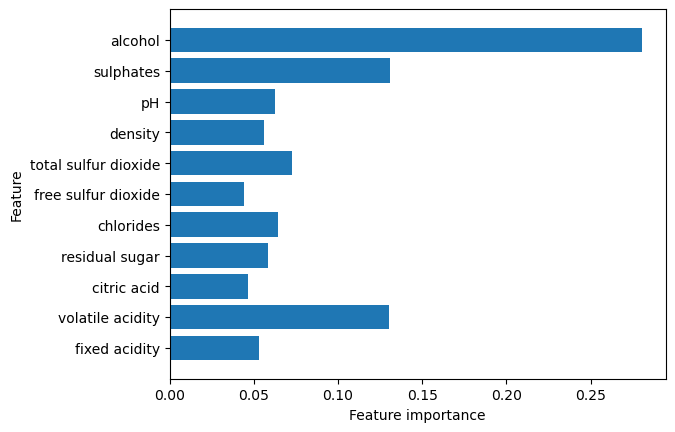

In [19]:
plot_feature_importances(rforest)

### Red Wine Random Forest with Max Features

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3469313600.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3469313600.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3469313600.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X

Text(0.5, 0, 'Depth')

Text(0, 0.5, 'R^2')

Text(0.5, 1.0, 'Red Wine Accuracy Chart')

6


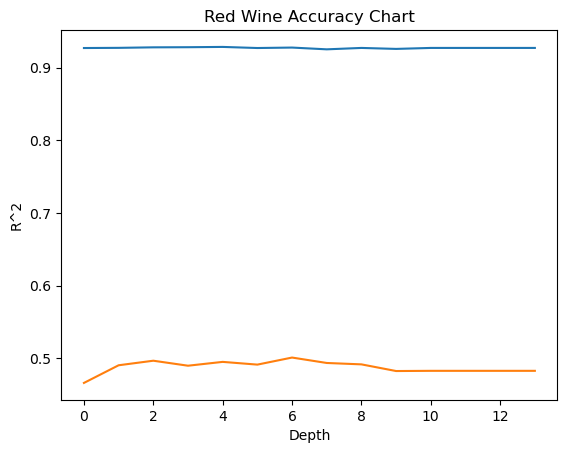

In [20]:
# create a chart to see what number of Max Features provides the highest R^2 value
rftrain = []
rftest = []
for i in range(1,15):
    z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
    rftrain.append(z.score(X_train, y_train))
    rftest.append(z.score(X_test, y_test))

# plot the graph to see best max depth
plt.plot(rftrain)
plt.plot(rftest)
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.title('Red Wine Accuracy Chart')

# find the best depth based on highest test accuracy
rfmaxd = rftest.index(max(rftest))
print(rfmaxd)

In [21]:
# Display the test results of the forest with the best R^2
rmforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=rfmaxd).fit(X_train, y_train)

print('Train set R^2: {:.3f}'.format(rforest.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(rforest.score(X_test, y_test)))

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\3898595264.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=rfmaxd).fit(X_train, y_train)


Train set R^2: 0.927
Test set R^2: 0.483


## White Wine Decision Tree

In [22]:
# convert the data into a 2D array with np.newaxis
X = dfw.drop('quality', axis=1)
y = dfw['quality'][:,np.newaxis]

# split the white wine data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\2074544832.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dfw['quality'][:,np.newaxis]


Text(0.5, 0, 'Depth')

Text(0, 0.5, 'R^2')

Text(0.5, 1.0, 'White Wine Accuracy Chart')

3


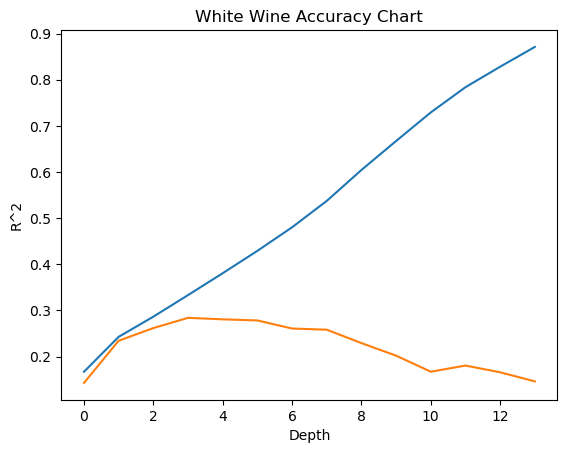

In [23]:
# create a list for train and test scores to find the best depth
wtrain = []
wtest = []
for i in range(1,15):
    z = DecisionTreeRegressor(max_depth=i, random_state=42).fit(X_train, y_train)
    wtrain.append(z.score(X_train, y_train))
    wtest.append(z.score(X_test, y_test))

# plot the graph to see best max depth
plt.plot(wtrain)
plt.plot(wtest)
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.title('White Wine Accuracy Chart')

# find the best depth based on highest test accuracy
wmaxd = wtest.index(max(wtest))
print(wmaxd)

In [24]:
# fit tree
wtree = DecisionTreeRegressor(max_depth=wmaxd, random_state=42).fit(X_train, y_train)

# predict on all data
X_all = X
wpred_tree = wtree.predict(X_all)

In [25]:
# create a decision tree and output it into a png by navigating to the file in cmd prompt then using:
# dot -Tpng whitetree.dot > whitetree.png
w_feature_names = dfw.columns.values.tolist()
w_feature_names.remove('quality')
export_graphviz(wtree, out_file="whitetree.dot",feature_names = w_feature_names, filled = True, rounded=True)
display(Image(filename='whitetree.png'))

In [26]:
# MSE
print("Mean squared error for train set: %.2f" % mean_squared_error(y_train, wtree.predict(X_train)))
print("Mean squared error for test set: %.2f" % mean_squared_error(y_test, wtree.predict(X_test)))

# RMSE
print("Root Mean squared error for train set: %.2f" % math.sqrt(mean_squared_error(y_train, wtree.predict(X_train))))
print("Root Mean squared error for test set: %.2f" % math.sqrt(mean_squared_error(y_test, wtree.predict(X_test))))

# Coefficient of determination
print('Train set R^2: {:.3f}'.format(wtree.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(wtree.score(X_test, y_test)))

Mean squared error for train set: 0.56
Mean squared error for test set: 0.58
Root Mean squared error for train set: 0.75
Root Mean squared error for test set: 0.76
Train set R^2: 0.286
Test set R^2: 0.262


In [27]:
print("Accuracy on training set: {:.3f}".format(wtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(wtree.score(X_test, y_test)))

Accuracy on training set: 0.286
Accuracy on test set: 0.262


In [28]:
# print feature importanct of red wine
r=0
for i in X:
    print('{f}: {g:.3f}'.format(f=i, g=wtree.feature_importances_[r]))
    r+=1

fixed acidity: 0.000
volatile acidity: 0.211
citric acid: 0.020
residual sugar: 0.000
chlorides: 0.000
free sulfur dioxide: 0.123
total sulfur dioxide: 0.000
density: 0.000
pH: 0.000
sulphates: 0.000
alcohol: 0.646


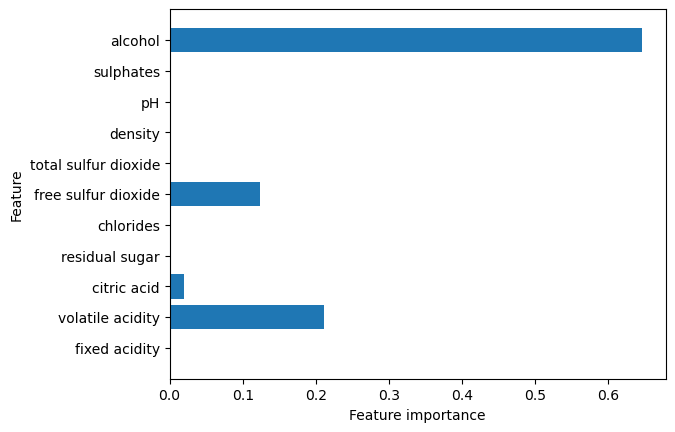

In [29]:
plot_feature_importances(wtree)

### White Wine Random Forest

In [30]:
wforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None)

wforest.fit(X_train, y_train)

wforest.predict(X_train)
wforest.predict(X_test)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\2121806288.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wforest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

array([5.87, 5.05, 5.84, ..., 5.1 , 6.77, 6.23])

array([5.36, 5.16, 6.  , ..., 5.16, 6.88, 5.04])

In [31]:
# MSE
print("Mean squared error for train set: %.2f" % mean_squared_error(y_train, wforest.predict(X_train)))
print("Mean squared error for test set: %.2f" % mean_squared_error(y_test, wforest.predict(X_test)))

# RMSE
print("Root Mean squared error for train set: %.2f" % math.sqrt(mean_squared_error(y_train, wforest.predict(X_train))))
print("Root Mean squared error for test set: %.2f" % math.sqrt(mean_squared_error(y_test, wforest.predict(X_test))))

# Coefficient of determination
print('Train set R^2: {:.3f}'.format(wforest.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(wforest.score(X_test, y_test)))

Mean squared error for train set: 0.05
Mean squared error for test set: 0.38
Root Mean squared error for train set: 0.23
Root Mean squared error for test set: 0.61
Train set R^2: 0.932
Test set R^2: 0.519


In [32]:
# print feature importance of white wine
r=0
for i in X:
    print('{f}: {g:.3f}'.format(f=i, g=wforest.feature_importances_[r]))
    r+=1

fixed acidity: 0.063
volatile acidity: 0.125
citric acid: 0.061
residual sugar: 0.071
chlorides: 0.062
free sulfur dioxide: 0.115
total sulfur dioxide: 0.069
density: 0.059
pH: 0.072
sulphates: 0.058
alcohol: 0.245


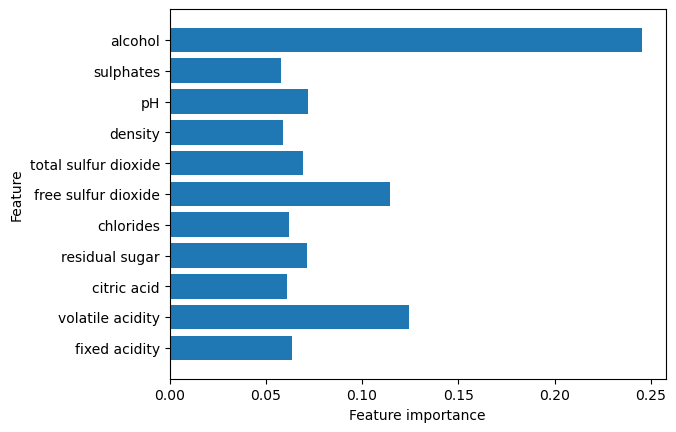

In [33]:
plot_feature_importances(wforest)

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\4010462042.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\4010462042.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\4010462042.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X

Text(0.5, 0, 'Depth')

Text(0, 0.5, 'R^2')

Text(0.5, 1.0, 'White Wine Accuracy Chart')

3


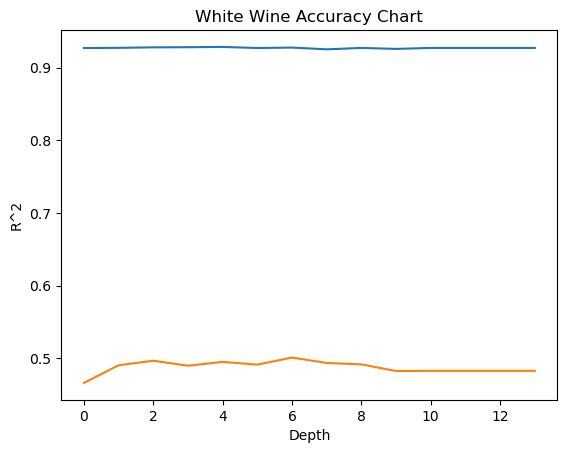

In [34]:
# create a chart to see what number of Max Features provides the highest R^2 value
wftrain = []
wftest = []
for i in range(1,15):
    z = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=i).fit(X_train, y_train)
    wftrain.append(z.score(X_train, y_train))
    wftest.append(z.score(X_test, y_test))

# plot the graph to see best max depth
plt.plot(rftrain)
plt.plot(rftest)
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.title('White Wine Accuracy Chart')

# find the best depth based on highest test accuracy
wfmaxd = wftest.index(max(wftest))
print(wfmaxd)

In [35]:
# Display the test results of the forest with the best R^2
wmforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=wfmaxd).fit(X_train, y_train)

print('Train set R^2: {:.3f}'.format(wmforest.score(X_train, y_train)))
print('Test set R^2: {:.3f}'.format(wmforest.score(X_test, y_test)))

C:\Users\ninja\AppData\Local\Temp\ipykernel_34136\551567666.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wmforest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, max_features=wfmaxd).fit(X_train, y_train)


Train set R^2: 0.933
Test set R^2: 0.524
